___

___
# K Means Clustering with Python


## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. 

In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:

Reassign data points to the cluster whose centroid is closest. 
Calculate new centroid of each cluster. 

These two steps are repeated till the within cluster variation cannot be reduced any further.
The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**drop the customer id column**

In [4]:
df.drop(columns="CustomerID", inplace=True)

### Exploratory Data Analysis and Visualization

**Explore if the dataset has any missing data points and create a statistical summary of the numerical features as shown below.**

In [5]:
df.isnull().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Genre               200 non-null    object
 1   Age                 200 non-null    int64 
 2   Annual_Income_(k$)  200 non-null    int64 
 3   Spending_Score      200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


**Perform a pairplot**

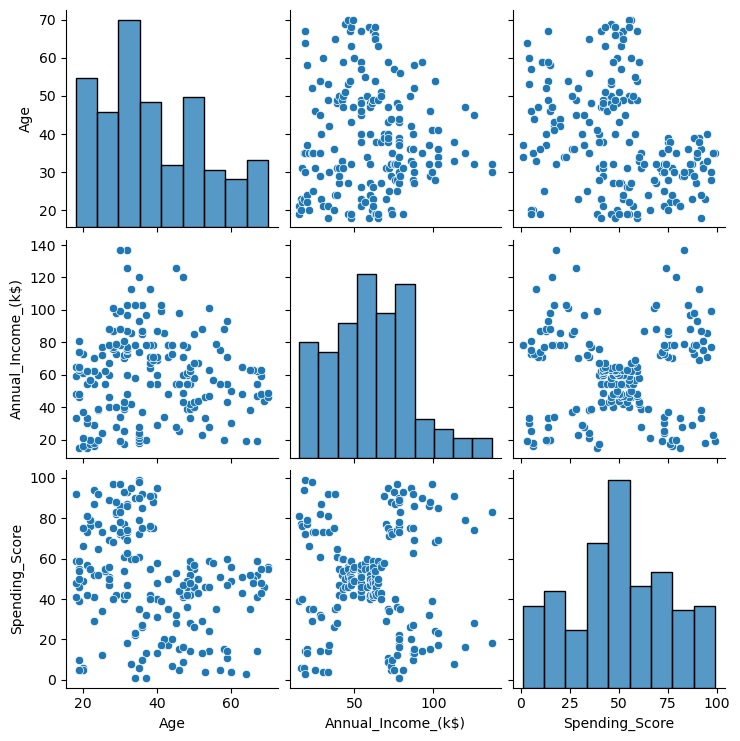

In [8]:
sns.pairplot(data=df)

**Create a heatmap that displays the correlation between all the columns.**

<AxesSubplot:>

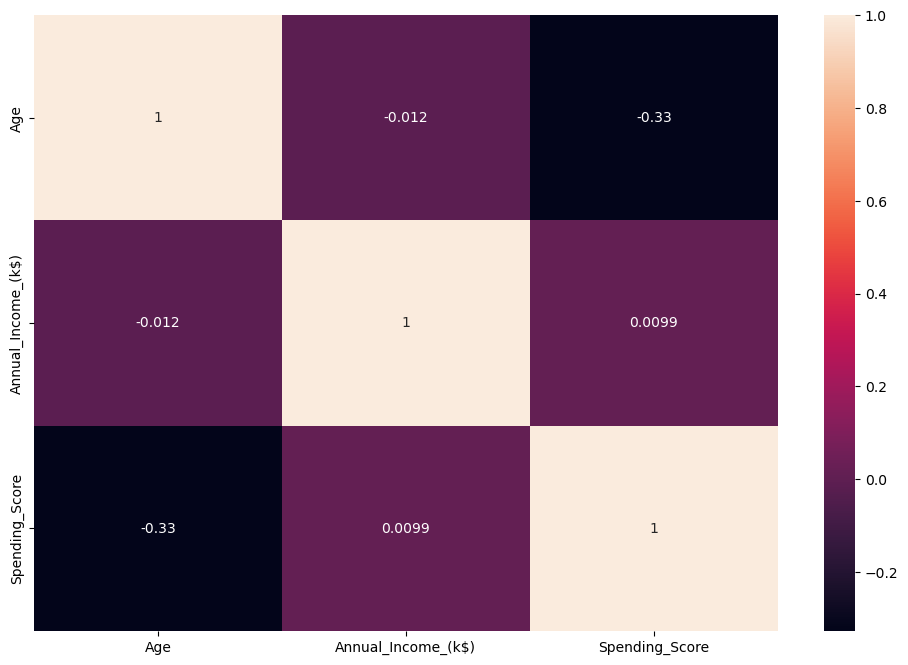

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

## K Means Cluster Creation

Now it is time to create the Cluster labels!

**Import KMeans from SciKit Learn.**

In [10]:
from sklearn.cluster import KMeans

**Select features (X) for training**

**Using only Spending_Score and income variable for easy visualisation**


In [11]:
df[["Annual_Income_(k$)","Spending_Score"]] #.values[:5]

,Annual_Income_(k$),Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [12]:
X = df[["Annual_Income_(k$)","Spending_Score"]].values

## Creating the Clusters

In [13]:
kmeans = KMeans(n_clusters=3)

In [14]:
kmeans.fit(X)

KMeans(n_clusters=3)

**Check selected cluster centers**

In [15]:
kmeans.cluster_centers_

array([[87.        , 18.63157895],
       [86.53846154, 82.12820513],
       [44.15447154, 49.82926829]])

**Check assigned groups to data points**

In [16]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

**Check the Sum of squared distances**

In [17]:
kmeans.inertia_

106348.37306211118

**Use the elbow method to find the optimal number of clusters**

In [18]:
ssd = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    ssd.append(kmeans.inertia_)

**Plot number of clusters/performence**

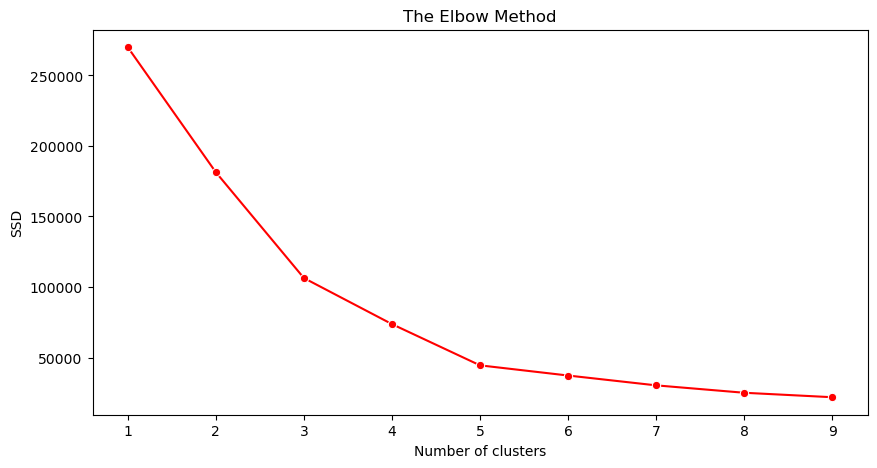

In [19]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 10), ssd,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSD')
plt.show()

**Train Kmeans with k=3**

In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

**Assign labels to new "label" column**

In [21]:
labels_sample = kmeans.labels_
df['label'] = labels_sample

**Plot data with new labels**

<AxesSubplot:xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

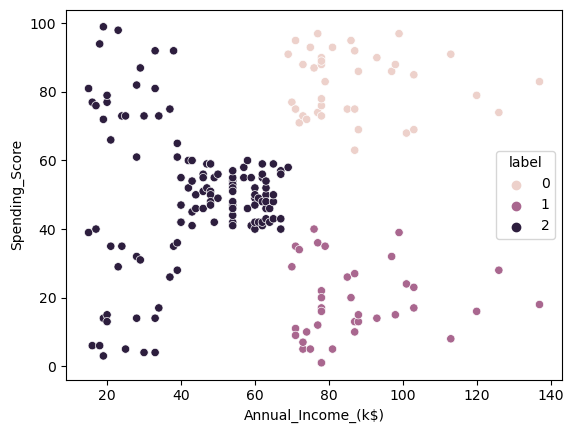

In [22]:
sns.scatterplot(df["Annual_Income_(k$)"],df["Spending_Score"],hue=df['label'])

We were able to create customer segmentation, with only a few lines of code using Scikit-Learn.  But what did we learn about the mall customers through this segmentation:

Label 0: Carefree, low income but spenders  

Label 1: Spenders, avg to high income and spend alot.

Label 2: Savers, avg to high income but spend wisely 

This was difficult to understand when we first plotted the data but now we know we have these 3 categories and Mall management can apply marketing strategies accordingly, for e.g, they might provide more saving offers to Label 0: savers group and open more lucrative shops for the Label 2: big spenders.

# Great Job!